> Importing libs needed for both tasks

In [117]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sn

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, RidgeClassifier, LogisticRegressionCV
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator

# 1. Regression task

In this task we must predict bitrate value applying __*linear regression*__ model on given set of data.

## 1.1 Reading data

In [82]:
test_df		= pd.read_csv('./bitrate_prediction/bitrate_test.csv')
train_df	= pd.read_csv('./bitrate_prediction/bitrate_train.csv')

# I decided to merge all rhe data into one df to explore whole dataset, because considered it more correct.
df_to_explore = pd.concat([test_df, train_df])

## 1.2 Data exploration
In this section we will take a look a:
1. Features this dataset contains.
2. Features correlation.
3. Duplicated rows.
4. Outliners.
5. Other observations

In [83]:
df_to_explore.shape

(607166, 10)

In [84]:
df_to_explore.head()

,fps_mean,fps_std,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,bitrate_mean,bitrate_std,target
0,29.9,0.316228,55.0,0.942809,0.0,0.0,0.0,682.8,36.468556,718.0
1,30.0,0.000000,55.0,0.942809,0.0,0.0,0.0,718.0,43.609377,670.9
2,30.0,0.000000,56.0,3.299832,0.0,0.0,0.0,670.9,24.378725,789.8
3,29.9,0.316228,58.4,4.599517,0.0,0.0,0.0,789.8,238.545500,723.2
4,30.0,0.000000,54.7,1.251666,0.0,0.0,0.0,723.2,40.846052,693.6


In [85]:
df_to_explore.describe()

,fps_mean,fps_std,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,bitrate_mean,bitrate_std,target
count,607166.000000,607166.000000,607166.000000,607166.000000,607166.000000,607166.000000,607166.000000,607166.000000,607166.000000,607166.000000
mean,35.194745,1.697624,48.825605,12.830653,0.178591,0.472985,1.459881,7379.792667,1591.362279,7389.067782
std,10.883878,2.449773,91.725277,104.431783,1.606105,3.141200,9.626510,6038.430940,1697.270367,6036.306465
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.900000,0.316228,14.300000,0.699206,0.000000,0.000000,0.000000,2690.500000,385.677712,2707.750000
50%,30.000000,0.942809,31.400000,1.505545,0.000000,0.000000,0.000000,6240.700000,1108.057810,6250.000000
75%,43.400000,2.211083,56.400000,5.313505,0.000000,0.000000,0.000000,10086.875000,2230.062900,10091.300000
max,125.800000,307.167273,12898.400000,40721.933293,540.000000,291.878228,923.000000,64913.500000,31201.672303,64913.000000


In [86]:
# 1
#
# Looking at features we'll work with
cols = list(df_to_explore.columns)
cols

['fps_mean',
 'fps_std',
 'rtt_mean',
 'rtt_std',
 'dropped_frames_mean',
 'dropped_frames_std',
 'dropped_frames_max',
 'bitrate_mean',
 'bitrate_std',
 'target']

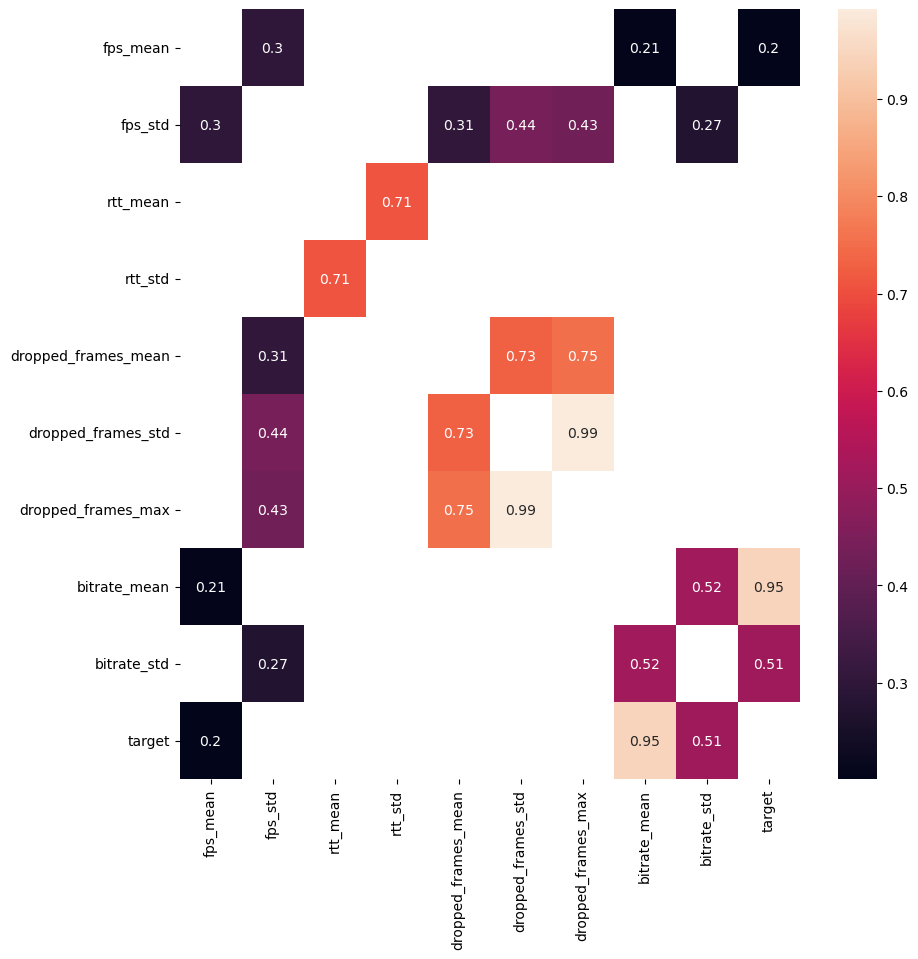

In [87]:
# 2
#
# Creating and visualizing correlation matrix
corr = df_to_explore.corr(method='pearson')
plt.figure(figsize=(10,10))
# Slicing correlation matrix not to litter image with redundant information
sn.heatmap(corr[((corr >= 0.2) | (corr <= -0.2)) & (corr != 1.0) & (corr != -1)], annot=True)
plt.show()

In [88]:
# 3
#
#  Checking if there are duplicated rows and count them
duplicated_num = np.count_nonzero(df_to_explore.duplicated())
print(f'rows:\t\t\t{df_to_explore.shape[0]}')
print(f'duplicated rows:\t{duplicated_num}')
print(f'ratio of duplicates:\t{(duplicated_num / df_to_explore.shape[0]):.3f}')

rows:			607166
duplicated rows:	5296
ratio of duplicates:	0.009


array([[<AxesSubplot:title={'center':'fps_mean'}>,
        <AxesSubplot:title={'center':'fps_std'}>,
        <AxesSubplot:title={'center':'rtt_mean'}>],
       [<AxesSubplot:title={'center':'rtt_std'}>,
        <AxesSubplot:title={'center':'dropped_frames_mean'}>,
        <AxesSubplot:title={'center':'dropped_frames_std'}>],
       [<AxesSubplot:title={'center':'dropped_frames_max'}>,
        <AxesSubplot:title={'center':'bitrate_mean'}>,
        <AxesSubplot:title={'center':'bitrate_std'}>],
       [<AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

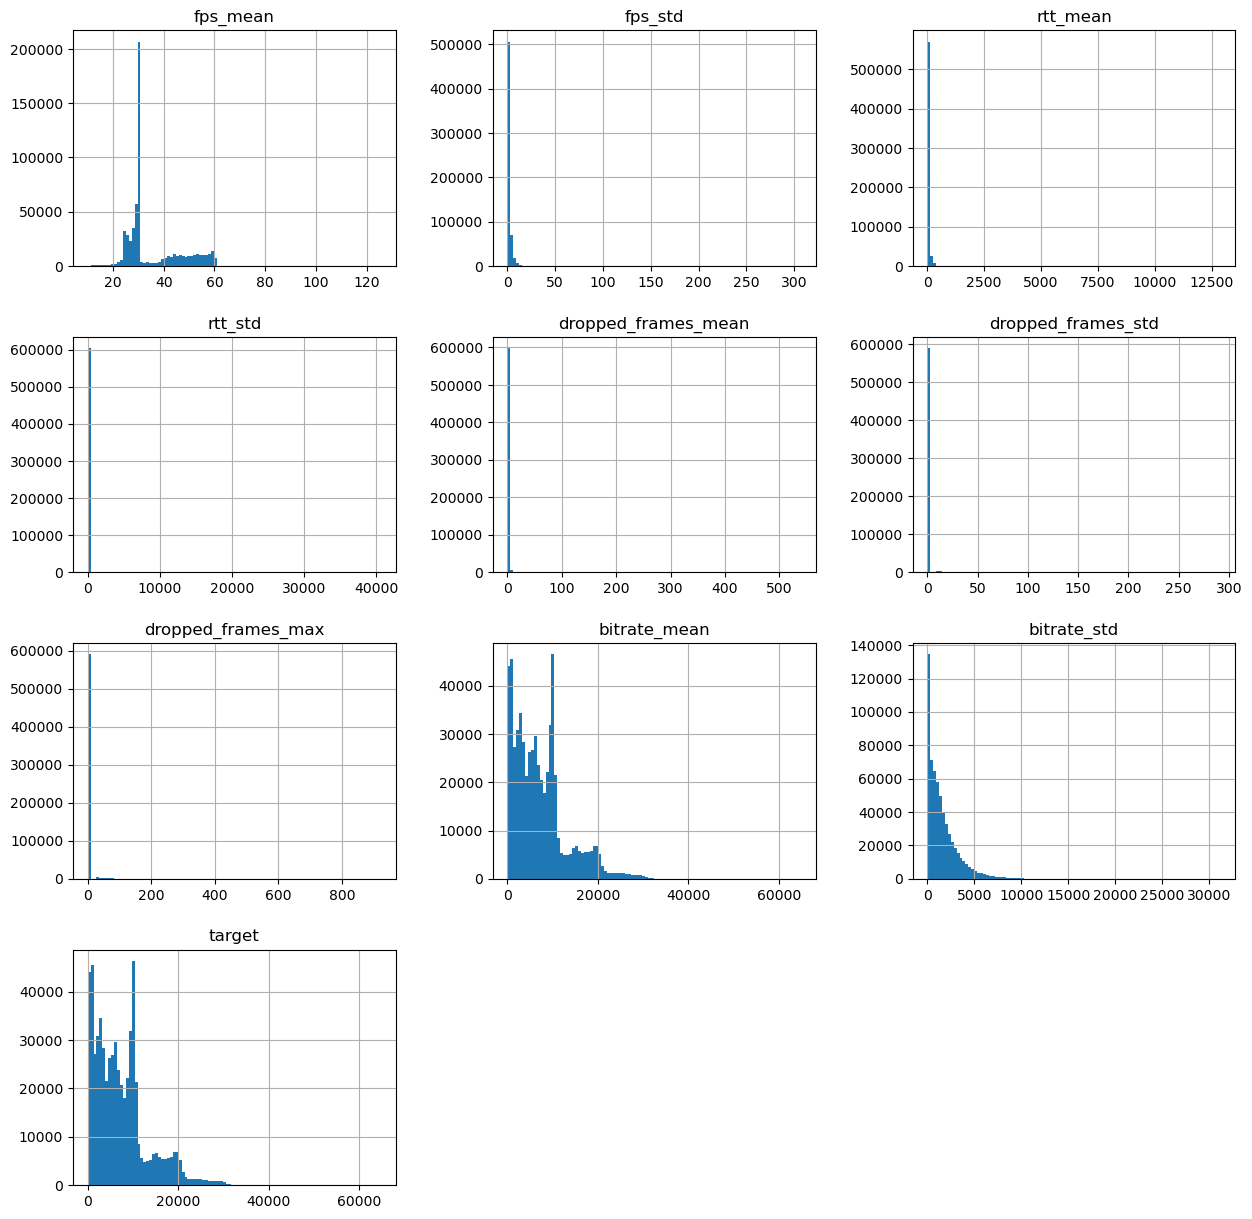

In [89]:
# 4
#
# Building diagrams to look how data is spread to slice the outliers
df_to_explore.hist(bins=100, figsize=(15,15))

In [90]:
# 5
#
#
frames_dropped_num = np.count_nonzero(df_to_explore['dropped_frames_mean'])
print(f"dropped frames occured:\t{frames_dropped_num}")
print(f"their ratio:{(frames_dropped_num / df_to_explore.shape[0]):.3f}")

dropped frames occured:	17011
their ratio:0.028


__Observations__

1. Data is represented as statistic measures (mean and standart deviation), that's why we have correlated pairs of mean-std values of one measure.
2. Target value is strongly correlated (~1.0) with bitrate_mean, because our target value is bitrate itself.
3. There are few duplicated rows, that are redundant for linear regression model.
4. As it shown in histograms, almost every feature is very spread, but most of values are concentrated at some area, that is because of precence of outliners.
5. All dropped frames features are highly correlated.
6. In most cases there are almost no dropped frames.

## 1.3 Data preprocessing

This step is logical continuation of previous one, that's why I decided to implement these steps:
1. Do not use (remove) bitrate_mean and bitrate_std features, because it's just not fair.
2. Remove dropped_frames_std and dropped_frames_max due to high correlation with dropped_frames_mean
3. Remove duplicated rows to decrease data complexity.
4. Remove outliners using some threshold values that could be found looking at histograms.
5. Scale features.

In [91]:
# 1
# 
# Removing bitrate_mean and bitrate_std_features
df_to_explore.drop(['bitrate_mean', 'bitrate_std'], inplace=True, axis=1)

In [92]:
# 2
#
# Removing dropped_frames_std, dropped_frames_max features, because they are highly correlated
# with dropped_frames_mean feature and I thought they were redundant
df_to_explore.drop(['dropped_frames_std', 'dropped_frames_max'], inplace=True, axis=1)

In [93]:
# 3
#
# Removing duplicated rows
df_to_explore.drop_duplicates()

,fps_mean,fps_std,rtt_mean,rtt_std,dropped_frames_mean,target
0,29.9,0.316228,55.0,0.942809,0.0,718.0
1,30.0,0.000000,55.0,0.942809,0.0,670.9
2,30.0,0.000000,56.0,3.299832,0.0,789.8
3,29.9,0.316228,58.4,4.599517,0.0,723.2
4,30.0,0.000000,54.7,1.251666,0.0,693.6
...,...,...,...,...,...,...
379016,40.0,0.000000,0.0,0.000000,0.0,3325.0
379017,40.0,0.000000,0.0,0.000000,0.0,3293.0
379018,40.0,0.000000,0.0,0.000000,0.0,3317.0
379019,40.0,0.000000,0.0,0.000000,0.0,3283.0


In [94]:
# 4
#
# Getting rid of outliners using thresholding

print(f"fps_mean outliners:\t{df_to_explore[df_to_explore['fps_mean'] >= 60].shape[0]}")
df_to_explore = df_to_explore[df_to_explore['fps_mean'] < 60]

print(f"fps_std outliners:\t{df_to_explore[df_to_explore['fps_std'] > 30].shape[0]}")
df_to_explore = df_to_explore[df_to_explore['fps_std'] < 30]

print(f"rtt_mean outliners:\t{df_to_explore[df_to_explore['rtt_mean'] >= 400].shape[0]}")
df_to_explore = df_to_explore[df_to_explore['rtt_mean'] < 400]

print(f"rtt_std outliners:\t{df_to_explore[df_to_explore['rtt_std'] >= 50].shape[0]}")
df_to_explore = df_to_explore[df_to_explore['rtt_std'] < 50]

print(f"dropped_frames_mean outliners:\t{df_to_explore[df_to_explore['dropped_frames_mean'] >= 10].shape[0]}")
df_to_explore = df_to_explore[train_df['dropped_frames_mean'] < 10]

fps_mean outliners:	4567
fps_std outliners:	60
rtt_mean outliners:	1744
rtt_std outliners:	18766
dropped_frames_mean outliners:	1151


C:\Users\serge\AppData\Local\Temp\ipykernel_10580\924354015.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_to_explore = df_to_explore[train_df['dropped_frames_mean'] < 10]


In [95]:
df_to_explore.shape

(580507, 6)

array([[<AxesSubplot:title={'center':'fps_mean'}>,
        <AxesSubplot:title={'center':'fps_std'}>],
       [<AxesSubplot:title={'center':'rtt_mean'}>,
        <AxesSubplot:title={'center':'rtt_std'}>],
       [<AxesSubplot:title={'center':'dropped_frames_mean'}>,
        <AxesSubplot:title={'center':'target'}>]], dtype=object)

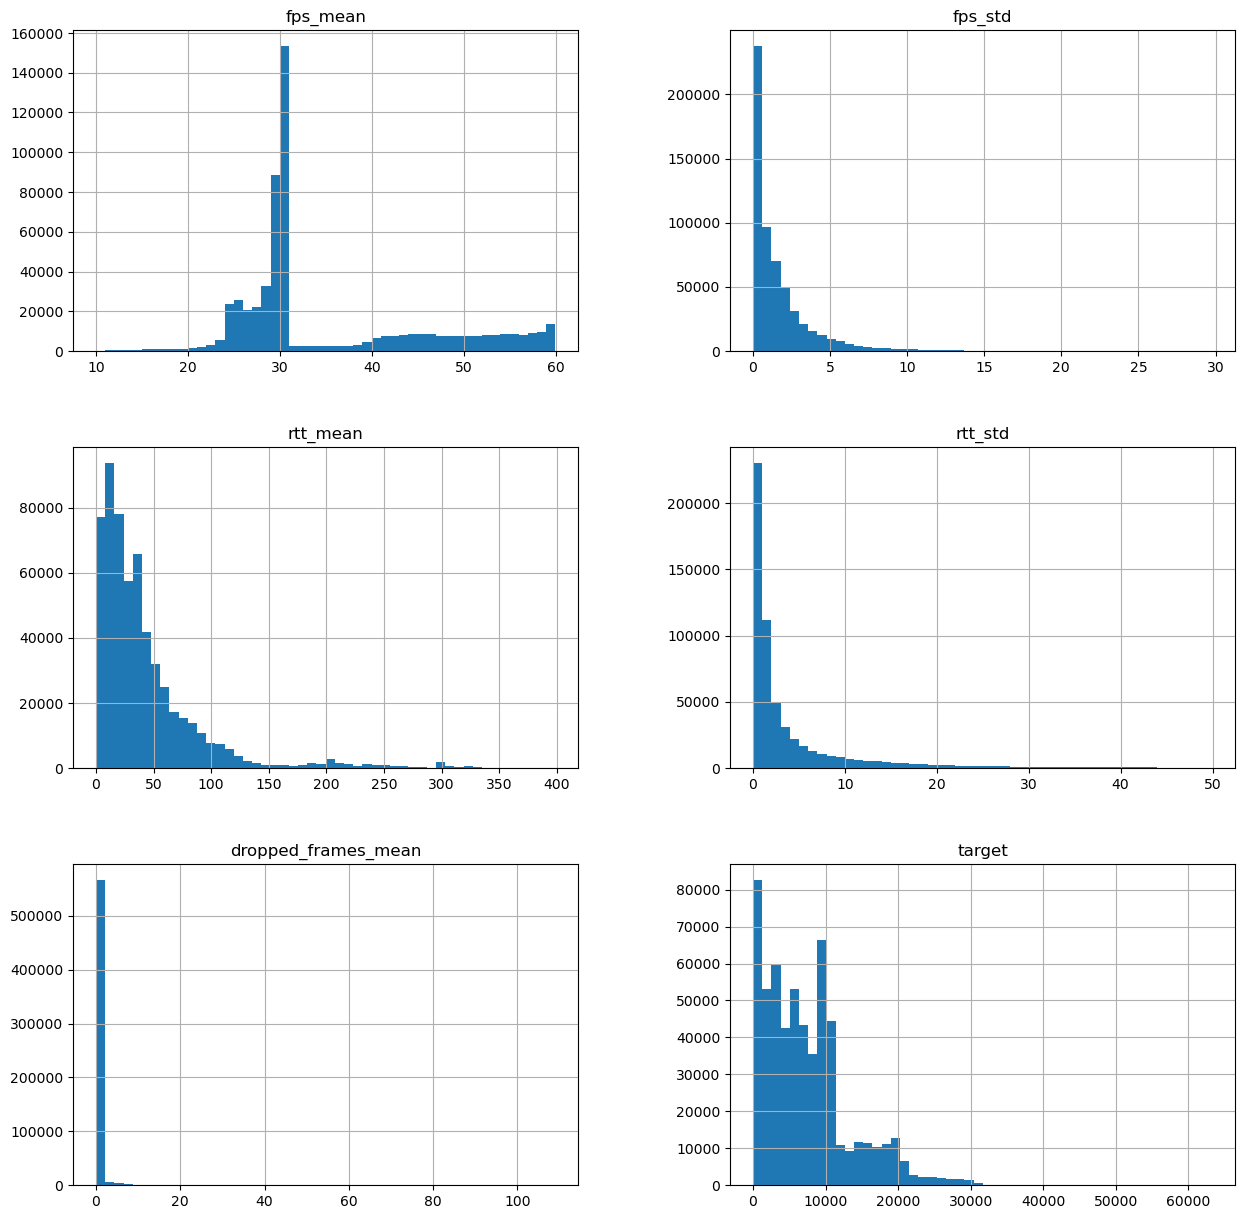

In [96]:
# Looking at histograms now
df_to_explore.hist(bins=50, figsize=(15,15))

In [97]:
# Extracting target column and dropping it from the rest of dataset
target = df_to_explore['target']
df_to_explore.drop('target', inplace=True, axis=1)

In [98]:
# Scaling features
scaler = MinMaxScaler().fit(df_to_explore)
df_to_explore = pd.DataFrame(scaler.transform(df_to_explore), columns=df_to_explore.columns, index=df_to_explore.index)

In [99]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_to_explore, target, test_size=0.33)

## 1.3 Model fitting and prediction

In this section I will apply different regression models and compare them using r_2 and MSE metrics.
Regression models:
1. Simple Linear Regression.
2. Simple Linear regression with __Lasso__ regularization (with different alpha-coefficients).
3. Simple Linear Regression with __Ridge__ regularization (with different alpha-coefficients).
4. Polynomial Regression with different degrees.

In [100]:
# 1. Implementing Simple Linear Regression
from statistics import mode


model = LinearRegression(fit_intercept=True).fit(X_train, y_train)
y_test_pred = model.predict(X_test)

metrics = {'r2_score': r2_score(y_test, y_test_pred), 'root_mean_squared_error':  mean_squared_error(y_test, y_test_pred, squared=False)}

model_metrics = pd.DataFrame(data=metrics, index=['LinearRegression'])
print(model_metrics)
pd.DataFrame(model.coef_, X_train.columns, columns=['weight'])

                  r2_score  root_mean_squared_error
LinearRegression   0.07608              5781.193352


,weight
fps_mean,5456.567434
fps_std,1961.012657
rtt_mean,-7252.199152
rtt_std,-3280.937152
dropped_frames_mean,21976.348207


As we can see, __dropped_frames_mean__ is the most valuable feature

In [101]:
def frange(start, stop, step):
	i = start
	while i < stop:
		yield i
		i += step

In [102]:
for alpha in frange(0.1, 1.1, 0.3):

	# 2. Ridge regression model
	ridge = Ridge(alpha=alpha)
	ridge.fit(X_train, y_train)
	ridge_predict = ridge.predict(X_test)
	ridge_metrics = pd.DataFrame({'r2_score': r2_score(y_test, ridge_predict), 'root_mean_squared_error':  mean_squared_error(y_test, ridge_predict, squared=False)}, index=['Ridge_' + str(alpha)])

	# 3. Lasso regression model
	lasso = Lasso(alpha=alpha)
	lasso.fit(X_train, y_train)
	lasso_predict = lasso.predict(X_test)
	lasso_metrics = pd.DataFrame({'r2_score': r2_score(y_test, lasso_predict), 'root_mean_squared_error':  mean_squared_error(y_test, lasso_predict, squared=False)}, index=['Lasso_' + str(alpha)])

	model_metrics = pd.concat([model_metrics, lasso_metrics])
	model_metrics = pd.concat([model_metrics, ridge_metrics])
model_metrics

,r2_score,root_mean_squared_error
LinearRegression,0.076080,5781.193352
Lasso_0.1,0.076068,5781.232153
Ridge_0.1,0.076080,5781.195489
Lasso_0.4,0.075990,5781.474503
Ridge_0.4,0.076077,5781.202227
Lasso_0.7,0.075853,5781.905875
Ridge_0.7,0.076075,5781.209428
Lasso_1.0,0.075654,5782.526280
Ridge_1.0,0.076073,5781.217062


Regularization didn't show any improvements in result according to chosen metrics.

In [103]:
for i in range (2, 6):
	# Getting polynomial features values for both training and testing sets
	poly = PolynomialFeatures(degree=i)
	poly_train_features = poly.fit_transform(X_train)
	poly_test_features = poly.fit_transform(X_test)
	
	# Using simple Linear regression to fit polynomial features
	poly_reg_model = LinearRegression().fit(poly_train_features, y_train)
	poly_predict = poly_reg_model.predict(poly_test_features)
	
	poly_metrics = pd.DataFrame({'r2_score': r2_score(y_test, poly_predict), 'root_mean_squared_error':  mean_squared_error(y_test, poly_predict, squared=False)}, index=['Poly_' + str(i)])
	model_metrics = pd.concat([model_metrics, poly_metrics])
model_metrics

,r2_score,root_mean_squared_error
LinearRegression,0.076080,5781.193352
Lasso_0.1,0.076068,5781.232153
Ridge_0.1,0.076080,5781.195489
Lasso_0.4,0.075990,5781.474503
Ridge_0.4,0.076077,5781.202227
Lasso_0.7,0.075853,5781.905875
Ridge_0.7,0.076075,5781.209428
Lasso_1.0,0.075654,5782.526280
Ridge_1.0,0.076073,5781.217062
Poly_2,0.093277,5727.138973


Using Polynomial regression increased model perfomance according to chosen metrics, degree of 4 has shown the best perfomance.  
Degree=5 increased error and decreased r2-score.

In [104]:
model_metrics.sort_values(by=['root_mean_squared_error'], ascending=True)

,r2_score,root_mean_squared_error
Poly_4,0.111939,5667.895736
Poly_3,0.102125,5699.125856
Poly_2,0.093277,5727.138973
LinearRegression,0.076080,5781.193352
Ridge_0.1,0.076080,5781.195489
Ridge_0.4,0.076077,5781.202227
Ridge_0.7,0.076075,5781.209428
Ridge_1.0,0.076073,5781.217062
Lasso_0.1,0.076068,5781.232153
Lasso_0.4,0.075990,5781.474503


## 1.4 Model validation
In this section we will apply cross validation technique to measure model perfomance.

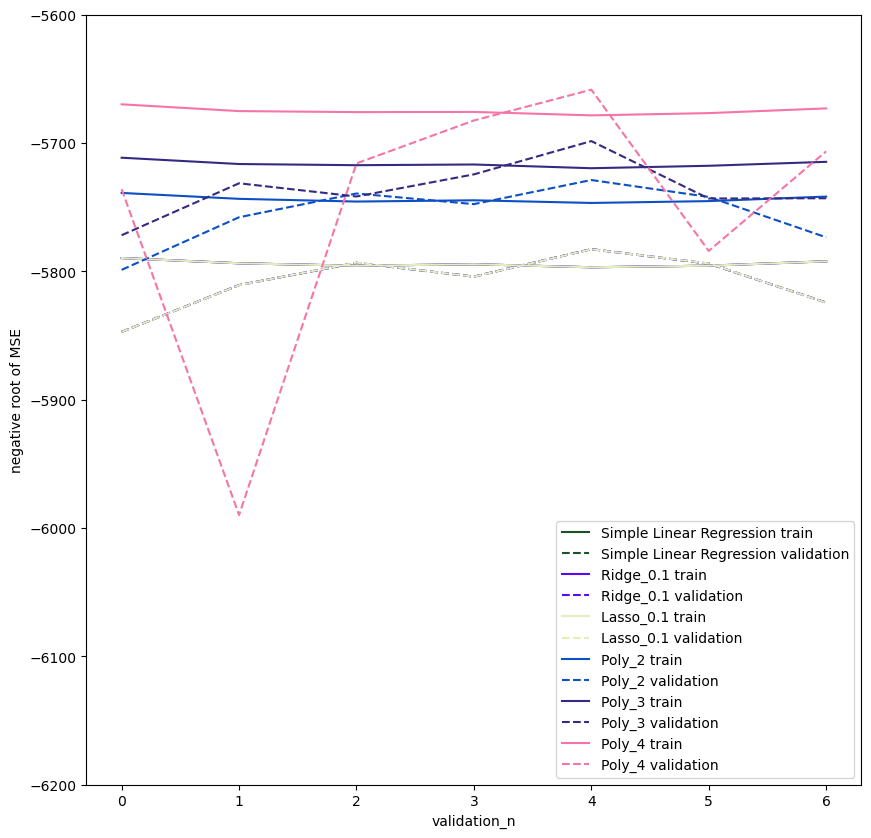

In [115]:
folds = 7

RANDOM_STATE = 200

estimators = {
    "Simple Linear Regression" : LinearRegression(),
    "Ridge_0.1" : Ridge(0.1),
	"Lasso_0.1" : Lasso(0.1)
}

# Cross-validate linear models
for n in estimators:
	cv = cross_validate(estimators[n], X_train, y_train, cv=ShuffleSplit(folds, random_state=RANDOM_STATE),
	return_train_score=True, scoring='neg_root_mean_squared_error')

	color = np.random.rand(3,)
	plt.plot(np.arange(folds), cv["train_score"], c=color, label=f'{n} train')
	plt.plot(np.arange(folds), cv["test_score"], c=color, linestyle="dashed", label=f'{n} validation')

# Cross-validate polynomial models
for i in range(2, 5):
	poly = PolynomialFeatures(degree=i)
	poly_train_features = poly.fit_transform(X_train)

	cv = cross_validate(LinearRegression(), poly_train_features, y_train, cv=ShuffleSplit(folds, random_state=RANDOM_STATE),
	return_train_score=True, scoring='neg_root_mean_squared_error')

	color = np.random.rand(3,)
	plt.plot(np.arange(folds), cv["train_score"], c=color, label=f'Poly_{i} train')
	plt.plot(np.arange(folds), cv["test_score"], c=color, linestyle="dashed", label=f'Poly_{i} validation')

# Setting parameters to plot
plt.rcParams["figure.figsize"] = (10,10)
plt.legend(loc='lower right')
plt.ylim((-6200, -5600))
plt.xlabel("validation_n")
plt.ylabel("negative root of MSE")
plt.show()

__Conclusion__
1. The best perfomance has shown Polynomial regression of degree 4 and 3.
2. Polynomial regression with degree 5 had the biggest error, that's why was decided not to increase degree value anymore.
3. Both regularizations have shown worse perfomance, than *Simple Linear Regression*

# 2. Classification Task

In this task out goal is detecting the stream quality

## 2.1 Reading data

In [119]:
test_df		= pd.read_csv('./stream_quality_data/test_data.csv')
train_df	= pd.read_csv('./stream_quality_data/train_data.csv')

# Again, all the preprocessing should be done with both parts of data, that's why they should be concatenated
df_to_explore = pd.concat([test_df, train_df])

## 2.2 Data exploration.

1. Explore data using common pandas methods.
2. Visualize correlation between features.
3. Count duplicates.
4. Build histograms of features distribution.

In [57]:
df_to_explore.shape

(650168, 12)

In [58]:
df_to_explore.head()

,fps_mean,fps_std,fps_lags,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,auto_bitrate_state,auto_fec_state,auto_fec_mean,stream_quality
0,29.9,0.316228,0,55.0,0.942809,0.0,0.0,0.0,off,partial,50.0,0
1,30.0,0.000000,0,55.0,0.942809,0.0,0.0,0.0,off,partial,50.0,0
2,30.0,0.000000,0,56.0,3.299832,0.0,0.0,0.0,off,partial,50.0,0
3,29.9,0.316228,0,58.4,4.599517,0.0,0.0,0.0,off,partial,50.0,0
4,30.0,0.000000,0,54.7,1.251666,0.0,0.0,0.0,off,partial,50.0,0


In [59]:
df_to_explore.describe()

,fps_mean,fps_std,fps_lags,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,auto_fec_mean,stream_quality
count,650168.000000,650168.000000,650168.000000,650168.000000,650168.000000,6.501680e+05,6.501680e+05,6.501680e+05,650168.000000,650168.000000
mean,34.556642,2.276461,0.153216,54.673840,19.959219,1.093914e+06,8.618901e+04,1.195786e+06,50.662484,0.066949
std,11.390549,3.651651,0.948374,145.837785,152.651721,3.916072e+07,7.299028e+06,4.161067e+07,35.156210,0.249934
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,28.400000,0.316228,0.000000,14.300000,0.699206,0.000000e+00,0.000000e+00,0.000000e+00,50.000000,0.000000
50%,30.000000,0.994429,0.000000,31.700000,1.563472,0.000000e+00,0.000000e+00,0.000000e+00,50.000000,0.000000
75%,42.900000,2.573368,0.000000,57.900000,5.812821,0.000000e+00,0.000000e+00,0.000000e+00,50.000000,0.000000
max,127.100000,312.540842,10.000000,13456.800000,40721.933293,2.097289e+09,9.963751e+08,2.097289e+09,250.000000,1.000000


In [60]:
df_to_explore['auto_bitrate_state'].unique()

array(['off', 'partial', 'full'], dtype=object)

In [61]:
df_to_explore['auto_fec_state'].unique()

array(['partial', 'off'], dtype=object)

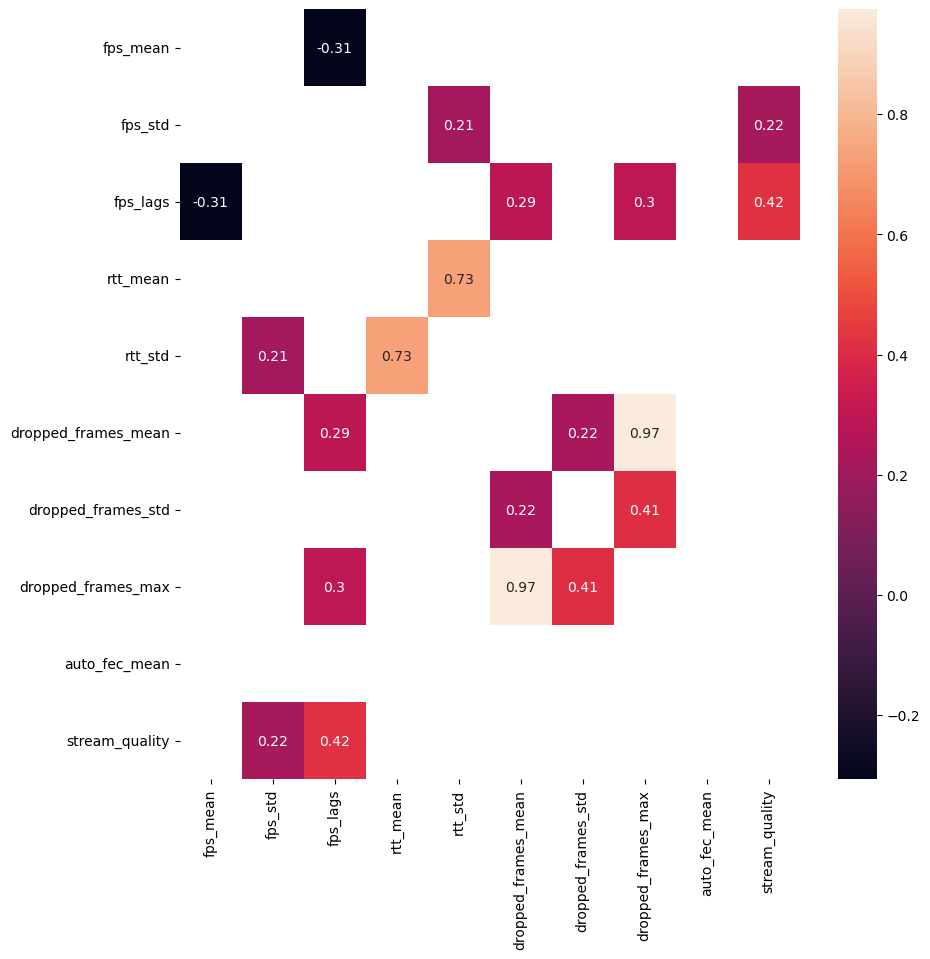

In [62]:
corr = df_to_explore.corr(method='pearson')
plt.figure(figsize=(10,10))

sn.heatmap(corr[((corr >= 0.2) | (corr <= -0.2)) & (corr != 1.0) & (corr != -1)], annot=True)
plt.show()

array([[<AxesSubplot:title={'center':'fps_mean'}>,
        <AxesSubplot:title={'center':'fps_std'}>,
        <AxesSubplot:title={'center':'fps_lags'}>],
       [<AxesSubplot:title={'center':'rtt_mean'}>,
        <AxesSubplot:title={'center':'rtt_std'}>,
        <AxesSubplot:title={'center':'dropped_frames_mean'}>],
       [<AxesSubplot:title={'center':'dropped_frames_std'}>,
        <AxesSubplot:title={'center':'dropped_frames_max'}>,
        <AxesSubplot:title={'center':'auto_fec_mean'}>],
       [<AxesSubplot:title={'center':'stream_quality'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

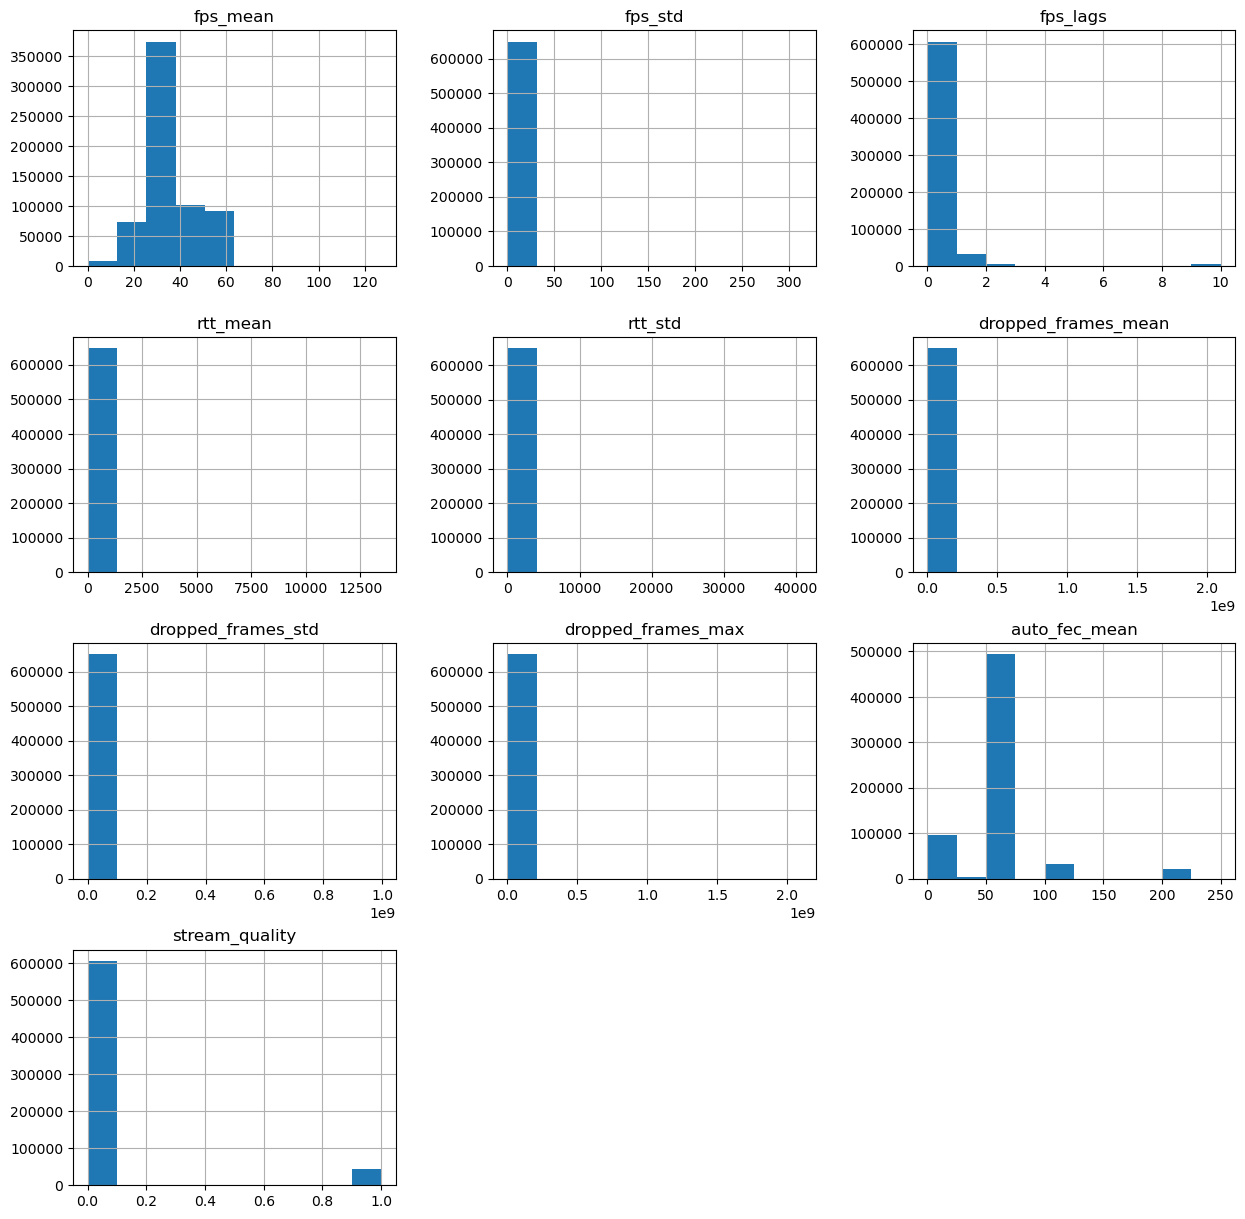

In [63]:
df_to_explore.hist(bins=10, figsize=(15,15))

In [64]:
duplicated_num = np.count_nonzero(df_to_explore.duplicated())
print(f'rows:\t\t\t{df_to_explore.shape[0]}')
print(f'duplicated rows:\t{duplicated_num}')
print(f'ratio of duplicates:\t{(duplicated_num / df_to_explore.shape[0]):.3f}')

rows:			650168
duplicated rows:	60532
ratio of duplicates:	0.093


__Observations__
1. Most of data again represented as statistical values of measurments.
2. There are two categorial features (auto_bitrate_state, auto_fec_state)
3. auto_fec_state has two unique values (partial, off), auto_bitrate_state 3 (off, partial, full)
4. Target variable is imbalanced, because there are ~7% of positive cases
5. *dropped_frames_mean* and *dropped_frames_max* features are highly correlated again
6. fps_lags has some correlation with target
7. There are also a lot of outliers
8. There are ~10% of duplicated rows

## 2.3 Data preprocessing
According to observations made on previous step, these steps of data processing will be applied:
1. Delete otliers
2. Encode categorical features.
3. Drop dropped_frames_max feature due to it's high correlation with dropped_frames_mean
4. Decided not to drop duplicates, because same measurments are measurments too. And in case of logistic regression it could give repeated measurments higher weights.


In [120]:
# 1. Deleting outliers using threshold values chosen from histograms.
df_to_explore = df_to_explore[df_to_explore['fps_mean'] < 70]
df_to_explore = df_to_explore[df_to_explore['fps_std'] < 30]
df_to_explore = df_to_explore[df_to_explore['rtt_mean'] < 600]
df_to_explore = df_to_explore[df_to_explore['rtt_std'] < 1000]
df_to_explore = df_to_explore[df_to_explore['dropped_frames_mean'] < 8]
df_to_explore = df_to_explore[df_to_explore['dropped_frames_mean'] < 100]


In [121]:
# 2. Encoding categorial features
# auto_fec_state has only partial and off values that could be binarized using
df_to_explore["auto_fec_state"] = df_to_explore["auto_fec_state"].apply(lambda x: 1 if x!="off" else 0)

# auto_bitrate_state seems to have some ordered sequence of categorial data (off->partial->full)
df_to_explore["auto_bitrate_state"] = df_to_explore["auto_bitrate_state"].apply(lambda x: 0 if x=="off" else 1 if x=='partial' else 2)

df_to_explore[["auto_bitrate_state", "auto_fec_state"]]

,auto_bitrate_state,auto_fec_state
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
406567,2,1
406568,2,1
406569,2,1
406570,2,1


In [122]:
# 3. Dropping dropped_frames_max
df_to_explore.drop(['dropped_frames_max'], inplace=True, axis=1)

array([[<AxesSubplot:title={'center':'fps_mean'}>,
        <AxesSubplot:title={'center':'fps_std'}>,
        <AxesSubplot:title={'center':'fps_lags'}>],
       [<AxesSubplot:title={'center':'rtt_mean'}>,
        <AxesSubplot:title={'center':'rtt_std'}>,
        <AxesSubplot:title={'center':'dropped_frames_mean'}>],
       [<AxesSubplot:title={'center':'dropped_frames_std'}>,
        <AxesSubplot:title={'center':'auto_bitrate_state'}>,
        <AxesSubplot:title={'center':'auto_fec_state'}>],
       [<AxesSubplot:title={'center':'auto_fec_mean'}>,
        <AxesSubplot:title={'center':'stream_quality'}>, <AxesSubplot:>]],
      dtype=object)

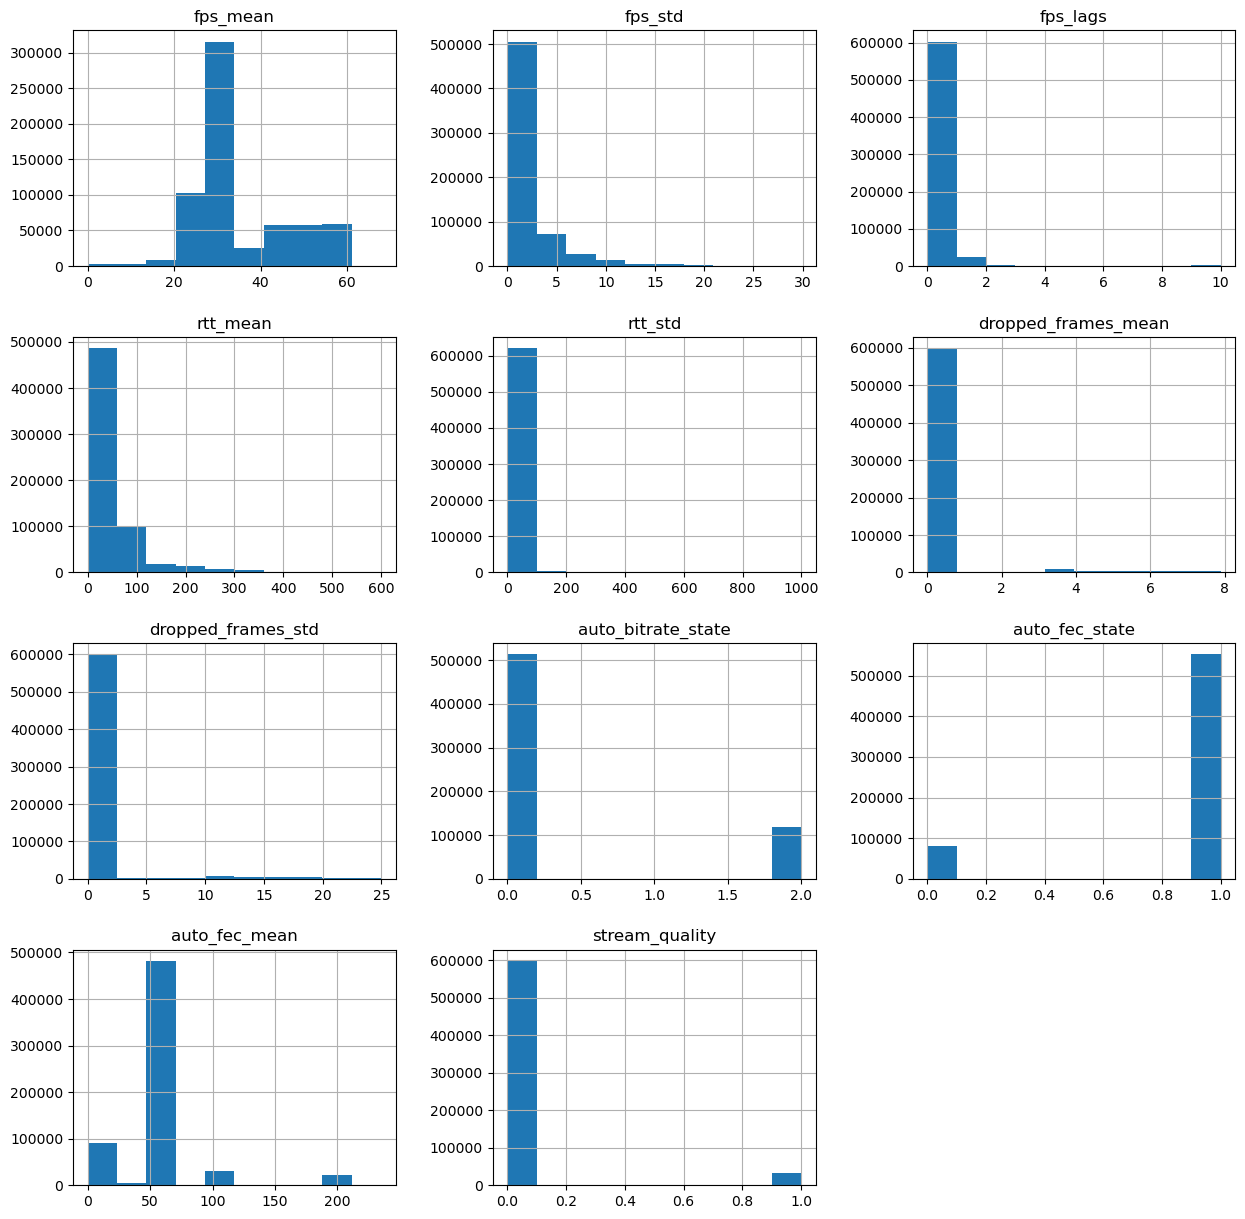

In [123]:
# Look at histograms again
df_to_explore.hist(bins=10, figsize=(15,15))

In [124]:
# Extracting target column and dropping it from the rest of dataset
target = df_to_explore['stream_quality']
df_to_explore.drop('stream_quality', inplace=True, axis=1)

In [125]:
# Scaling features
scaler = MinMaxScaler().fit(df_to_explore)
df_to_explore = pd.DataFrame(scaler.transform(df_to_explore), columns=df_to_explore.columns, index=df_to_explore.index)

In [126]:
df_to_explore.shape

(631781, 10)

In [127]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_to_explore, target, test_size=0.33)

# 2.4 Model fitting and calculating metrics

In this section first Logistic Regression models would be applied to evaluate chosen features and calculate metrics of perfomance. Following models were provided:
1. Simple Logistic Regression.
2. Balanced Logistic Regression.
3. Polynomial Logistic Regression.
4. Logistic Regression with l1 and l2 penalties.

In [128]:
model=LogisticRegression().fit(X_train, y_train)
pd.DataFrame(model.coef_, columns=X_train.columns).T

,0
fps_mean,-1.248298
fps_std,2.086382
fps_lags,7.916938
rtt_mean,1.677987
rtt_std,1.342605
dropped_frames_mean,2.723849
dropped_frames_std,-1.694058
auto_bitrate_state,0.303998
auto_fec_state,0.684670
auto_fec_mean,0.141058


accuracy score: 0.8530802732051724
precision score: 0.9254682867503164
recall score: 0.8530802732051724
f1_score score: 0.8832749049407346
precision score unweighted: 0.17719089224252052


<AxesSubplot:>

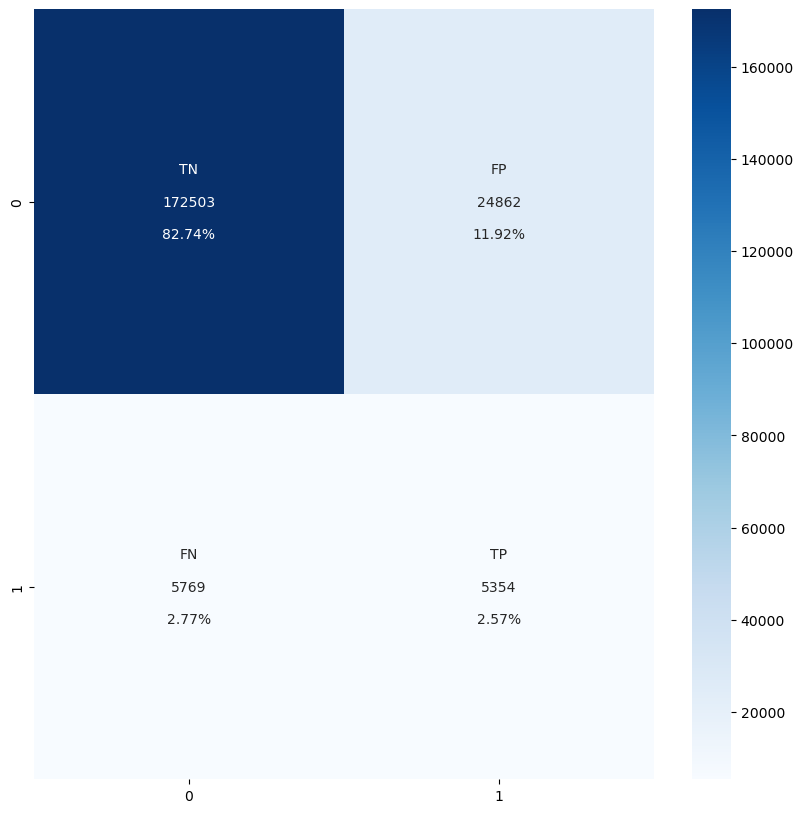

In [129]:
threshold = 0.5

model = LogisticRegression(max_iter=1000, class_weight="balanced").fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:,0] < threshold

print(f'accuracy score: {accuracy_score(y_test, y_pred)}')
print(f'precision score: {precision_score(y_test, y_pred, average="weighted")}')
print(f'recall score: {recall_score(y_test, y_pred, average="weighted")}')
print(f'f1_score score: {f1_score(y_test, y_pred, average="weighted")}')
print(f'precision score unweighted: {precision_score(y_test, y_pred)}')


conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
names = ["TN", "FP", "FN", "TP"]
counts = [f"{value:0.0f}" for value in conf_matrix.flatten()]
percentages = [f"{value:.2%}" for value in conf_matrix.flatten() / np.sum(conf_matrix)]
labels = np.array(
	[
		f"{name}\n\n{count}\n\n{percentage}"
		for name, count, percentage in zip(names, counts, percentages)
	]
).reshape(2, 2)

sn.heatmap(conf_matrix, annot=labels, fmt="", cmap="Blues")

- From confusion matrix we can clearly see that our data is really imbalanced, so model could work poorly in tasks with balanced data.  
- We also want to find the best thresholding value to classify our target, that's why we can calculate metrics values with some step to visually find the best __threshold value__.

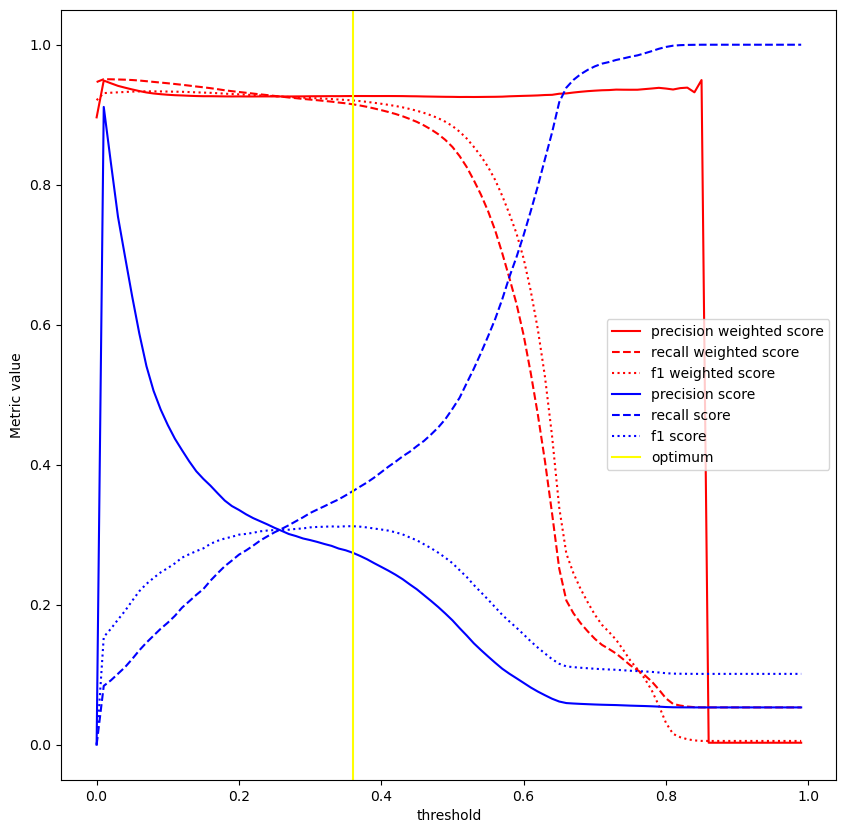

In [139]:
y_proba = model.predict_proba(X_train)[:,0]
thr = np.arange(0.0, 1.0, 0.01)

precision_w = [precision_score(y_train, y_proba < i, average="weighted", zero_division=0) for i in thr]
recall_w = [recall_score(y_train, y_proba < i, average="weighted", zero_division=0) for i in thr]
f1_w = [f1_score(y_train, y_proba < i, average="weighted", zero_division=0) for i in thr]
precision = [precision_score(y_train, y_proba < i, zero_division=0) for i in thr]
recall = [recall_score(y_train, y_proba < i, zero_division=0) for i in thr]
f1 = [f1_score(y_train, y_proba < i, zero_division=0) for i in thr]

optimum = thr[np.argmax(f1)]

c="red"
plt.plot(thr, precision_w, c=c, label="precision weighted score")
plt.plot(thr, recall_w, c=c, label="recall weighted score", linestyle="dashed")
plt.plot(thr, f1_w, c=c, label="f1 weighted score", linestyle=":")

c="blue"
plt.plot(thr, precision, c=c, label="precision score")
plt.plot(thr, recall, c=c, label="recall score", linestyle="dashed")
plt.plot(thr, f1, c=c, label="f1 score", linestyle=":")

plt.axvline(optimum, c='yellow', label='optimum')
plt.xlabel('threshold')
plt.ylabel('Metric value')
plt.legend()
plt.show()

We can see now that more preferable values for us are under optimum value, more appropriate for me was _0.2_, because at this point __precision weighted score__ began to grow, and at the same time __recall__ and __f1__ didn't to decrease yet.

In [ ]:
for i in range(2, 4):
	poly = PolynomialFeatures(degree = i, interaction_only=False, include_bias=False)
	lr = LogisticRegression(max_iter=500)
	pipe = Pipeline([('polynomial_features',poly), ('logistic_regression',lr)])
	pipe.fit(X_train, y_train)
	print(pipe.score(X_test, y_test))

0.9511626568435594
0.951344921530256


c:\Users\serge\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9513928859214918


In [ ]:
lr_l1_weighted = LogisticRegression(penalty="l1", max_iter=100, class_weight='balanced', solver="saga")
lr_l1_weighted.fit(X_train, y_train)
print("L1 weighted score:" + str(lr_l1_weighted.score(X_train, y_train)))

L1 weighted score:0.8574084617510802


In [ ]:
lr_l2_weighted = LogisticRegression(penalty="l2", max_iter=100, class_weight='balanced')
lr_l2_weighted.fit(X_train, y_train)
print("L2 weighted score:" + str(lr_l2_weighted.score(X_train, y_train)))

L2 weighted score:0.8570871712974228


In [79]:
lr_l1 = LogisticRegression(penalty="l1", max_iter=100, solver="saga")
lr_l1.fit(X_train, y_train)
print("L1 score:" + str(lr_l1.score(X_train, y_train)))

L1 score:0.9508945340461572


In [80]:
lr_l2 = LogisticRegression(penalty="l2", max_iter=100)
lr_l2.fit(X_train, y_train)
print("L2 score:" + str(lr_l2.score(X_train, y_train)))

L2 score:0.9508756346077067


We can see that models without weighting show better scores, but that's because they applied on imbalanced dataset.